<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/3_4_Bidirectional_Recurrent_Neural_Network_(BiRNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bidirectional Recurrent Neural Network (BiRNN)

## Введение в Bidirectional Recurrent Neural Networks

Bidirectional Recurrent Neural Networks (BiRNN) — это расширение стандартных рекуррентных нейронных сетей (RNN), позволяющее обрабатывать последовательные данные с обеих сторон. В традиционных RNN информация передается только в одном направлении — от начала последовательности к концу. BiRNN, в свою очередь, включает два потока обработки: один для прямого направления (от начала к концу последовательности) и один для обратного направления (от конца к началу). Это позволяет модели учитывать контекст из обеих сторон последовательности, что особенно полезно в задачах, требующих полного понимания контекста, например, в обработке естественного языка и распознавании речи.

## Архитектура BiRNN

BiRNN состоит из двух RNN, которые работают параллельно:

1. **Прямой RNN (Forward RNN)**: Обрабатывает последовательность от первого до последнего элемента.
2. **Обратный RNN (Backward RNN)**: Обрабатывает последовательность от последнего до первого элемента.

### Прямой проход (Forward Pass)

Для каждого временного шага $t$ прямой и обратный RNN вычисляют скрытые состояния следующим образом:

- Для прямого RNN:
$$
h_t^{(f)} = f(W_f \cdot x_t + U_f \cdot h_{t-1}^{(f)})
$$

- Для обратного RNN:
$$
h_t^{(b)} = f(W_b \cdot x_t + U_b \cdot h_{t+1}^{(b)})
$$

где:
- $h_t^{(f)}$ — скрытое состояние прямого RNN,
- $h_t^{(b)}$ — скрытое состояние обратного RNN,
- $f$ — функция активации (обычно используется $\tanh$ или $\text{ReLU}$),
- $W_f$, $U_f$, $W_b$, $U_b$ — весовые матрицы.

### Объединение скрытых состояний

После того как оба RNN обработали последовательность, их скрытые состояния объединяются для формирования итогового представления:

$$
h_t = [h_t^{(f)}; h_t^{(b)}]
$$

где $[;]$ обозначает операцию конкатенации.

## Обучение и минимизация функции потерь

Обучение BiRNN происходит аналогично другим RNN, с использованием метода обратного распространения ошибки через время (Backpropagation Through Time, BPTT). Для этого необходимо минимизировать функцию потерь $L$, которая может быть, например, кросс-энтропией в задачах классификации.

### Обновление весов

Обновление весов в BiRNN происходит для каждой из двух ветвей (прямой и обратной) следующим образом:

$$
W_f = W_f - \eta \frac{\partial L}{\partial W_f}
$$

$$
W_b = W_b - \eta \frac{\partial L}{\partial W_b}
$$

где $\eta$ — скорость обучения, а $\frac{\partial L}{\partial W_f}$ и $\frac{\partial L}{\partial W_b}$ — градиенты функции потерь по весам.

### Backpropagation Through Time (BPTT)

Обучение BiRNN через BPTT включает расчет градиентов для каждого из временных шагов, учитывая как прямой, так и обратный потоки:

1. **Градиенты для прямого RNN**:
   $$ \frac{\partial L}{\partial W_f} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial h_t^{(f)}} \cdot \frac{\partial h_t^{(f)}}{\partial W_f} $$

2. **Градиенты для обратного RNN**:
   $$ \frac{\partial L}{\partial W_b} = \sum_{t=1}^{T} \frac{\partial L_t}{\partial h_t^{(b)}} \cdot \frac{\partial h_t^{(b)}}{\partial W_b} $$

## Преимущества BiRNN

1. **Улучшенное представление контекста**: BiRNN может учитывать информацию как из прошлого, так и из будущего, что приводит к более точному представлению последовательностей.

2. **Гибкость в обработке последовательностей**: BiRNN подходит для различных задач, включая анализ тональности, машинный перевод и извлечение информации.

3. **Поддержка сложных зависимостей**: Модель способна лучше улавливать долгосрочные зависимости в данных за счет работы с двумя направлениями.

## Применения BiRNN

- **Обработка естественного языка**: Например, в задачах, связанных с анализом текста, BiRNN может учитывать контекст слов как до, так и после рассматриваемого слова, что улучшает качество понимания текста.

- **Распознавание речи**: BiRNN позволяет учитывать звуки, которые произносятся как до, так и после текущего звука, что способствует более точному распознаванию.

- **Видеозаписи**: В задачах, связанных с анализом видео, BiRNN может использовать информацию из предыдущих и следующих кадров для более точной интерпретации сцен.


Давайте рассмотрим конкретный числовой пример Bidirectional Recurrent Neural Network (BiRNN) на простом наборе данных. Предположим, у нас есть последовательность из трех временных шагов с одним входным значением на каждом шаге. Мы будем использовать простую активацию и числовые значения для весов, чтобы проиллюстрировать процесс.

### Условия задачи

**Входные данные**: Пусть наша входная последовательность $X = [x_1, x_2, x_3]$, где:
- $x_1 = [1]$
- $x_2 = [2]$
- $x_3 = [3]$

**Весовые матрицы**:
- Для прямого RNN:
  - $W_f = \begin{bmatrix} 0.2 \end{bmatrix}$ (вес для входа)
  - $U_f = \begin{bmatrix} 0.5 \end{bmatrix}$ (вес для скрытого состояния)
- Для обратного RNN:
  - $W_b = \begin{bmatrix} 0.3 \end{bmatrix}$ (вес для входа)
  - $U_b = \begin{bmatrix} 0.4 \end{bmatrix}$ (вес для скрытого состояния)

**Начальное скрытое состояние**:
- $h_0^{(f)} = 0$ (прямой RNN)
- $h_3^{(b)} = 0$ (обратный RNN)

### Шаги вычисления

#### 1. Прямой проход (Forward RNN)

##### Шаг 1: $t=1$

- **Вход**: $x_1 = 1$
- **Скрытое состояние**:
$$
h_1^{(f)} = f(W_f \cdot x_1 + U_f \cdot h_0^{(f)}) = f(0.2 \cdot 1 + 0.5 \cdot 0) = f(0.2)
$$

Пусть $f(z) = \tanh(z)$:
$$
h_1^{(f)} = \tanh(0.2) \approx 0.197
$$

##### Шаг 2: $t=2$

- **Вход**: $x_2 = 2$
- **Скрытое состояние**:
$$
h_2^{(f)} = f(W_f \cdot x_2 + U_f \cdot h_1^{(f)}) = f(0.2 \cdot 2 + 0.5 \cdot 0.197) = f(0.4 + 0.0985) = f(0.4985)
$$

$$
h_2^{(f)} = \tanh(0.4985) \approx 0.462
$$

##### Шаг 3: $t=3$

- **Вход**: $x_3 = 3$
- **Скрытое состояние**:
$$
h_3^{(f)} = f(W_f \cdot x_3 + U_f \cdot h_2^{(f)}) = f(0.2 \cdot 3 + 0.5 \cdot 0.462) = f(0.6 + 0.231) = f(0.831)
$$

$$
h_3^{(f)} = \tanh(0.831) \approx 0.685
$$

Теперь у нас есть скрытые состояния для прямого RNN:
- $h_1^{(f)} \approx 0.197$
- $h_2^{(f)} \approx 0.462$
- $h_3^{(f)} \approx 0.685$

#### 2. Обратный проход (Backward RNN)

##### Шаг 1: $t=3$

- **Вход**: $x_3 = 3$
- **Скрытое состояние**:
$$
h_3^{(b)} = f(W_b \cdot x_3 + U_b \cdot h_4^{(b)}) = f(0.3 \cdot 3 + 0.4 \cdot 0) = f(0.9)
$$

$$
h_3^{(b)} = \tanh(0.9) \approx 0.716
$$

##### Шаг 2: $t=2$

- **Вход**: $x_2 = 2$
- **Скрытое состояние**:
$$
h_2^{(b)} = f(W_b \cdot x_2 + U_b \cdot h_3^{(b)}) = f(0.3 \cdot 2 + 0.4 \cdot 0.716) = f(0.6 + 0.2864) = f(0.8864)
$$

$$
h_2^{(b)} = \tanh(0.8864) \approx 0.712
$$

##### Шаг 3: $t=1$

- **Вход**: $x_1 = 1$
- **Скрытое состояние**:
$$
h_1^{(b)} = f(W_b \cdot x_1 + U_b \cdot h_2^{(b)}) = f(0.3 \cdot 1 + 0.4 \cdot 0.712) = f(0.3 + 0.2848) = f(0.5848)
$$

$$
h_1^{(b)} = \tanh(0.5848) \approx 0.528
$$

Теперь у нас есть скрытые состояния для обратного RNN:
- $h_1^{(b)} \approx 0.528$
- $h_2^{(b)} \approx 0.712$
- $h_3^{(b)} \approx 0.716$

### 3. Объединение скрытых состояний

Теперь объединим скрытые состояния из прямого и обратного RNN:

- Для $t=1$:
$$
h_1 = [h_1^{(f)}; h_1^{(b)}] = [0.197; 0.528] \approx [0.197, 0.528]
$$

- Для $t=2$:
$$
h_2 = [h_2^{(f)}; h_2^{(b)}] = [0.462; 0.712] \approx [0.462, 0.712]
$$

- Для $t=3$:
$$
h_3 = [h_3^{(f)}; h_3^{(b)}] = [0.685; 0.716] \approx [0.685, 0.716]
$$

### Результаты

Таким образом, на выходе BiRNN для каждого временного шага мы получили следующие скрытые состояния:

- $h_1 \approx [0.197, 0.528]$
- $h_2 \approx [0.462, 0.712]$
- $h_3 \approx [0.685, 0.716]$

Эти объединенные скрытые состояния $h_t$ могут быть использованы для последующей обработки, например, для классификации или генерации последовательностей.

Таким образом, мы прошли через все шаги вычисления для Bidirectional RNN с использованием конкретных числовых примеров. Данная модель позволяет эффективно учитывать контекст из обеих сторон последовательности, что делает её мощным инструментом для работы с временными рядами и последовательными данными.






Давайте реализуем Bidirectional Recurrent Neural Network (BiRNN) на Python с использованием библиотеки NumPy для вычислений и Matplotlib для визуализации. Мы создадим простую BiRNN, которая будет работать с числовыми данными, как в нашем примере, и визуализируем скрытые состояния для каждого временного шага.

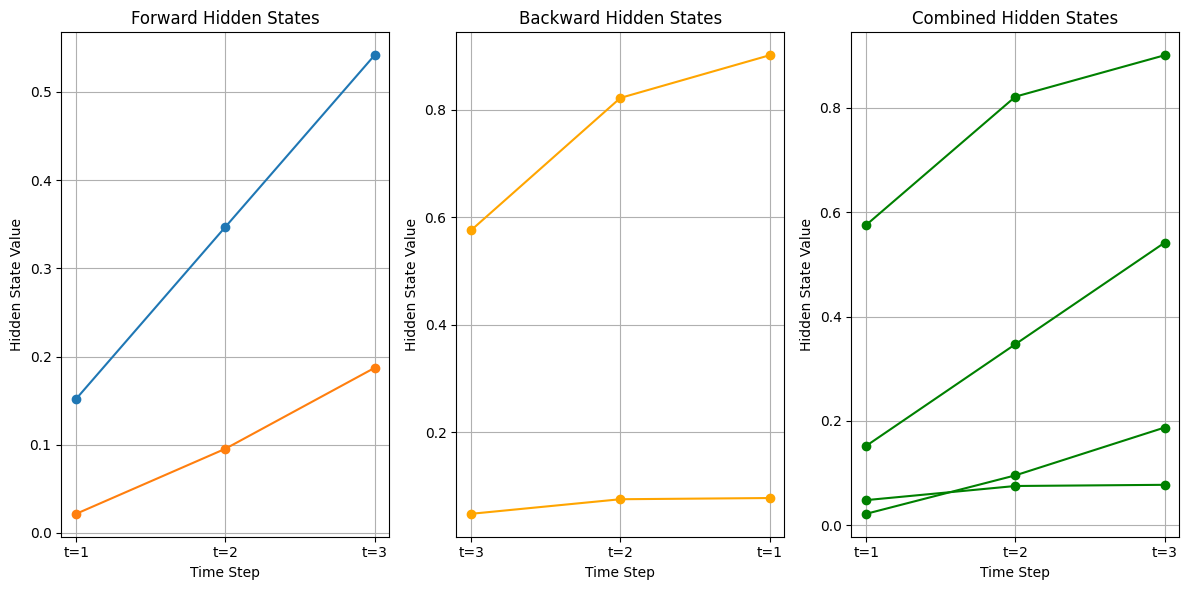

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Функция активации
def tanh(x):
    return np.tanh(x)

# Производная функции tanh
def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

# BiRNN класс
class BidirectionalRNN:
    def __init__(self, input_size, hidden_size):
        # Инициализация весов
        self.W_f = np.random.rand(hidden_size, input_size) * 0.5
        self.U_f = np.random.rand(hidden_size, hidden_size) * 0.5
        self.W_b = np.random.rand(hidden_size, input_size) * 0.5
        self.U_b = np.random.rand(hidden_size, hidden_size) * 0.5

        self.hidden_size = hidden_size

    def forward(self, X):
        T = len(X)
        h_f = np.zeros((T, self.hidden_size))  # Прямые скрытые состояния
        h_b = np.zeros((T, self.hidden_size))  # Обратные скрытые состояния

        # Прямой проход
        for t in range(T):
            if t == 0:
                h_f[t] = tanh(self.W_f @ X[t] + self.U_f @ np.zeros(self.hidden_size))
            else:
                h_f[t] = tanh(self.W_f @ X[t] + self.U_f @ h_f[t-1])

        # Обратный проход
        for t in range(T-1, -1, -1):
            if t == T-1:
                h_b[t] = tanh(self.W_b @ X[t] + self.U_b @ np.zeros(self.hidden_size))
            else:
                h_b[t] = tanh(self.W_b @ X[t] + self.U_b @ h_b[t+1])

        # Объединение скрытых состояний
        h = np.concatenate((h_f, h_b), axis=1)  # Конкатенация
        return h_f, h_b, h

# Входные данные
X = np.array([[1], [2], [3]])  # Входная последовательность

# Инициализация и выполнение BiRNN
input_size = 1
hidden_size = 2
birnn = BidirectionalRNN(input_size, hidden_size)

h_f, h_b, h = birnn.forward(X)

# Визуализация
plt.figure(figsize=(12, 6))

# Прямые скрытые состояния
plt.subplot(1, 3, 1)
plt.title('Forward Hidden States')
plt.plot(h_f, marker='o')
plt.xlabel('Time Step')
plt.ylabel('Hidden State Value')
plt.xticks(np.arange(3), ['t=1', 't=2', 't=3'])
plt.grid()

# Обратные скрытые состояния
plt.subplot(1, 3, 2)
plt.title('Backward Hidden States')
plt.plot(h_b, marker='o', color='orange')
plt.xlabel('Time Step')
plt.ylabel('Hidden State Value')
plt.xticks(np.arange(3), ['t=3', 't=2', 't=1'])
plt.grid()

# Объединенные скрытые состояния
plt.subplot(1, 3, 3)
plt.title('Combined Hidden States')
plt.plot(h, marker='o', color='green')
plt.xlabel('Time Step')
plt.ylabel('Hidden State Value')
plt.xticks(np.arange(3), ['t=1', 't=2', 't=3'])
plt.grid()

plt.tight_layout()
plt.show()

###Заключение
Bidirectional RNN представляет собой мощный инструмент для обработки последовательных данных, позволяющий учитывать контекст из обеих сторон. С их помощью можно значительно улучшить качество многих задач в области обработки данных и искусственного интеллекта. Внедрение BiRNN в различные приложения открывает новые горизонты в анализе и интерпретации сложных данных.



### Вопросы для самопроверки

1.Что такое Bidirectional RNN (BiRNN) и в чем его основное отличие от обычной RNN?
2.Каковы основные компоненты BiRNN? Опишите их функции.
3.Как происходит обучение BiRNN и какие методы используются для минимизации функции потерь?
4.Объясните, как работают прямой и обратный проход в BiRNN.
5.Какую роль играют весовые матрицы в BiRNN и как они инициализируются?
6.Каковы преимущества использования BiRNN по сравнению с однонаправленной RNN?
7.Что такое функции активации и почему они важны в нейронных сетях?
8.Опишите процесс объединения скрытых состояний в BiRNN. Как осуществляется эта операция?
9.Что такое затухание градиента и как BiRNN помогает его избежать?
10.Каково значение гиперболического тангенса (tanh) в вычислении скрытых состояний?
11.Как можно визуализировать скрытые состояния BiRNN? Какие инструменты для этого можно использовать?
12.Как можно применять BiRNN в реальных задачах, например, в обработке текста или временных рядов?
13.Что такое Backpropagation Through Time (BPTT) и как он применяется в BiRNN?
14.Каков пример входных данных для BiRNN? Как они должны быть структурированы?
15.Какие могут быть проблемы при обучении BiRNN и как их можно решить?

### Задачи для самостоятельной работы

#### Задачи на теорию и понимание

1. Опишите, как BiRNN может быть использован для решения задачи классификации последовательностей.
2. Как BiRNN может помочь в распознавании речи? Объясните.
3. Приведите пример набора данных, подходящего для обучения BiRNN.
4. Объясните, как изменится структура BiRNN, если добавить дополнительные скрытые слои.
5. Опишите, как можно применять регуляризацию в BiRNN для предотвращения переобучения.

#### Математические задачи

6. Дано скрытое состояние $h_t = [0.2, 0.5]$ и вход $x_t = [1]$. Найдите новое скрытое состояние $h_{t+1}$, если весовые матрицы $W = [0.3, 0.7]$ и $U = [0.1, 0.4]$ (используйте $\tanh$).
   
7. Вычислите градиент функции потерь по весам $W_f$ для прямого прохода, если значение функции потерь $L = 0.5$ и $\frac{\partial L}{\partial h_t} = 0.2$.

8. Рассчитайте новое скрытое состояние, если $h_{t-1} = [0.4, 0.6]$, $x_t = [1]$, $W = [0.5, 0.2]$, $U = [0.3, 0.7]$.

9. Примените функцию активации $\sigma(z) = \frac{1}{1 + e^{-z}}$ к $z = 0.5$. Какое значение вы получите?

10. Если выход BiRNN $h_t = [0.3, 0.8]$ и вы хотите применить обратное преобразование для получения скрытого состояния на предыдущем временном шаге, как это сделать?

11. Обучите BiRNN на последовательности $[1, 2, 3]$ и проанализируйте скрытые состояния. Как они меняются на каждом шаге?

12. Рассчитайте значение $h_2$ в BiRNN, если $h_1^{(f)} = [0.5, 0.3]$ и $h_1^{(b)} = [0.4, 0.6]$.

13. Используя значения $W = [0.5, 0.2]$ и $U = [0.3, 0.1]$, найдите $h_{t+1}$ для входного значения $x_t = [1]$ и скрытого состояния $h_t = [0.4, 0.6]$.

14. Примените функцию активации ReLU к вектору $[0.5, -0.1, 0.3, -0.4]$. Какой будет выход?

15. Вычислите общее количество параметров в BiRNN, если размер входного слоя равен 2, а размер скрытого слоя равен 3.

16. Найдите выход BiRNN для последовательности $X = [[1], [2], [3]]$, если весовые матрицы заданы как $W_f = [[0.2, 0.3], [0.4, 0.1]]$ и $U_f = [[0.5, 0.1], [0.3, 0.6]]$.

17. Дана функция потерь $L = (h - y)^2$, где $y = [0.5, 0.5]$ и $h = [0.6, 0.4]$. Найдите градиенты $\frac{\partial L}{\partial h}$.

18. Какое влияние на производительность BiRNN может оказать увеличение размера скрытого слоя? Приведите аргументы.

19. Рассчитайте выходы для BiRNN, если $h_1^{(f)} = [0.2, 0.5]$, $h_1^{(b)} = [0.3, 0.4]$.

20. Найдите скрытое состояние для BiRNN, если входы $X = [[1], [2], [3]]$, а весовые матрицы заданы как $W_f = [[0.1], [0.2]]$ и $U_f = [[0.3, 0.1], [0.4, 0.5]]$.

21. Как изменится градиент функции потерь, если использовать активацию ReLU вместо tanh?

22. Определите, как происходит объединение скрытых состояний в BiRNN с примерами для $h_f$ и $h_b$.

23. Если $h_t^{(f)} = [0.3, 0.7]$ и $h_t^{(b)} = [0.4, 0.2]$, каковы будут веса после обновления, если скорость обучения равна 0.01?

24. Найдите максимальное значение скрытого состояния, если $h_1 = [0.2, 0.5]$, $h_2 = [0.3, 0.8]$, $h_3 = [0.5, 0.4]$.

25. Рассчитайте значение функции потерь для BiRNN с параметрами $W = [0.5, 0.5]$ и $h = [0.2, 0.3]$ при $y = [1, 1]$.

26. Найдите производную функции потерь $L$ по весам $W$ в случае, если $L = (h - y)^2$.

27. Дана последовательность входов $[1, 2, 3]$ и весовые матрицы $W_f = [0.1, 0.2]$, $U_f = [0.3, 0.4]$. Найдите выходы для каждого временного шага.

28. Какое значение функции потерь будет у BiRNN, если на выходе $h = [0.5, 0.5]$ и целевое значение $y = [0.7, 0.2]$?

29. Определите количество параметров в BiRNN, если размер входного слоя 4, а размер скрытого слоя 5.

30. Найдите среднее значение скрытых состояний BiRNN для временной последовательности, если $h = [[0.1, 0.2], [0.3, 0.4], [0.5, 0.6]]$.
